In [1]:
import numpy as np
import pandas as pd
import time
import threading
import multiprocessing
import matplotlib.pyplot as plt
import psutil

In [2]:
def create_random_matrices(num, size):
    matrices = []
    for _ in range(num):
        matrices.append(np.random.rand(size, size))
    return matrices

def multiply_matrices_task(matrices):
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

def perform_multiplication_with_threads(num_threads):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=multiply_matrices_task, args=(matrices[i:i+num_threads],))
        threads.append(thread)
        thread.start()
        
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

def measure_cpu_utilization(duration):
    cpu_utilization = []
    start_time = time.time()
    while time.time() - start_time <= duration:
        cpu_utilization.append(psutil.cpu_percent(interval=1))
    return cpu_utilization

In [3]:
# Detect the number of CPU cores
num_cores = multiprocessing.cpu_count()

In [4]:
# Parameters
num_matrices = 100
matrix_size = 1000
matrices = create_random_matrices(num_matrices, matrix_size)

In [5]:
# Perform matrix multiplication with different numbers of threads
results = {}
utilization_results = {}
for num_threads in range(1, num_cores + 1):
    time_taken = perform_multiplication_with_threads(num_threads)
    results[num_threads] = time_taken
    cpu_utilization = measure_cpu_utilization(time_taken)
    utilization_results[num_threads] = sum(cpu_utilization) / len(cpu_utilization)

In [6]:
# Create DataFrame
df = pd.DataFrame.from_dict(results, orient='index', columns=['Time Taken (s)'])
df.index.name = 'Threads'
print(df)

         Time Taken (s)
Threads                
1              2.394450
2              2.210737
3              2.169060
4              2.210676
5              1.975488
6              2.128569
7              1.954899
8              2.014381
9              1.921177
10             1.899601
11             1.895299
12             1.888174


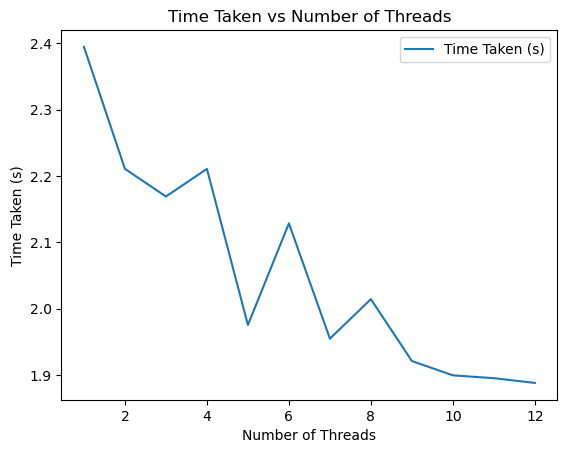

In [7]:
# Plot
df.plot()
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')
plt.show()

In [8]:
# Create Cores DataFrame
df = pd.DataFrame.from_dict(results, orient='index', columns=['Time Taken (s)'])
df['CPU Utilization (%)'] = utilization_results.values()
df.index.name = 'Cores'
print(df)

       Time Taken (s)  CPU Utilization (%)
Cores                                     
1            2.394450             9.600000
2            2.210737             9.033333
3            2.169060            12.133333
4            2.210676             8.833333
5            1.975488            13.100000
6            2.128569             8.033333
7            1.954899            12.250000
8            2.014381             8.333333
9            1.921177            11.300000
10           1.899601             9.500000
11           1.895299            10.400000
12           1.888174            10.650000


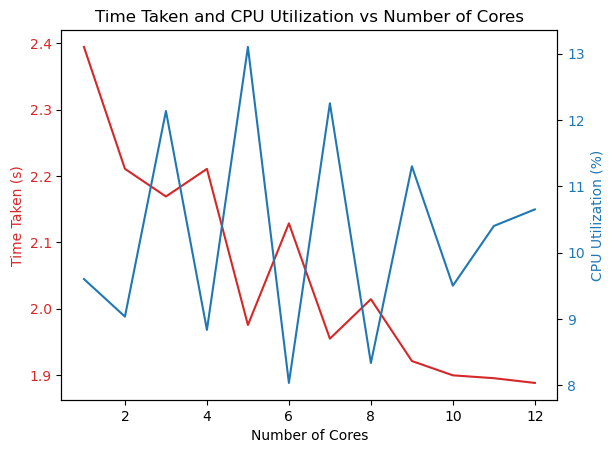

In [9]:
# Plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Cores')
ax1.set_ylabel('Time Taken (s)', color=color)
ax1.plot(df.index, df['Time Taken (s)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('CPU Utilization (%)', color=color)  
ax2.plot(df.index, df['CPU Utilization (%)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Time Taken and CPU Utilization vs Number of Cores')
plt.show()